In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import SimpleITK as sk
import os

In [9]:
data = './data/seg-lungs-LUNA16/seg-lungs-LUNA16/'
files = [f for f in os.listdir(data) if f.endswith('.mhd')]
files

['1.3.6.1.4.1.14519.5.2.1.6279.6001.299767339686526858593516834230.mhd',
 '1.3.6.1.4.1.14519.5.2.1.6279.6001.221945191226273284587353530424.mhd',
 '1.3.6.1.4.1.14519.5.2.1.6279.6001.957384617596077920906744920611.mhd',
 '1.3.6.1.4.1.14519.5.2.1.6279.6001.113679818447732724990336702075.mhd',
 '1.3.6.1.4.1.14519.5.2.1.6279.6001.151764021165118974848436095034.mhd',
 '1.3.6.1.4.1.14519.5.2.1.6279.6001.230491296081537726468075344411.mhd',
 '1.3.6.1.4.1.14519.5.2.1.6279.6001.148935306123327835217659769212.mhd',
 '1.3.6.1.4.1.14519.5.2.1.6279.6001.267957701183569638795986183786.mhd',
 '1.3.6.1.4.1.14519.5.2.1.6279.6001.226564372605239604660221582288.mhd',
 '1.3.6.1.4.1.14519.5.2.1.6279.6001.866845763956586959109892274084.mhd',
 '1.3.6.1.4.1.14519.5.2.1.6279.6001.326057189095429101398977448288.mhd',
 '1.3.6.1.4.1.14519.5.2.1.6279.6001.249530219848512542668813996730.mhd',
 '1.3.6.1.4.1.14519.5.2.1.6279.6001.174168737938619557573021395302.mhd',
 '1.3.6.1.4.1.14519.5.2.1.6279.6001.323535944958374

In [10]:
file_1 = files[0]
file_path = os.path.join(data,file_1)

In [12]:
ct_image = sk.ReadImage(file_path)
ct_array = sk.GetArrayFromImage(ct_image)
ct_array

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [15]:
ct_array.shape

(156, 512, 512)

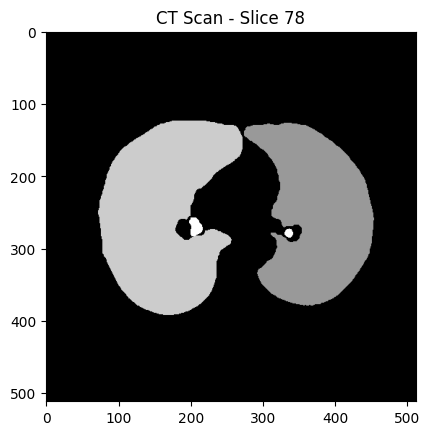

In [17]:
slice_index = ct_array.shape[0] // 2
plt.imshow(ct_array[slice_index, :, :], cmap='gray')
plt.title(f"CT Scan - Slice {slice_index}")
# plt.colorbar()
plt.show()

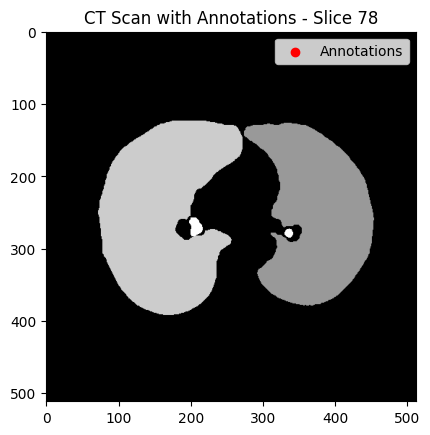

In [22]:
annotations_path = './data/annotations.csv'
annotations = pd.read_csv(annotations_path)

# Filter annotations for the selected CT scan
selected_annotations = annotations[annotations['seriesuid'] == file_1]

# Plot annotations on the CT scan slice
plt.imshow(ct_array[slice_index, :, :], cmap='gray')
plt.scatter(
    selected_annotations['coordX'],
    selected_annotations['coordY'],
    c='red',
    label='Annotations'
)
plt.title(f"CT Scan with Annotations - Slice {slice_index}")
plt.legend()
plt.show()